# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> : This data set contains information about 10,000 movies collected from The Movie Database (TMDb). This dataset was generated from The Movie Database API <br>
> : Dataset columns <br>
 > . homepage <br>
 > . id <br>
 > . original_title <br>
 > . overview <br>
 > . popularity <br>
 > . production_companies <br>
 > . production_countries <br>
 > . release_date <br>
 > . spoken_languages <br>
 > . status <br>
 > . tagline <br>
 > . vote_average <br>

### Question(s) for Analysis
 > . 1. Which year had the most released movie <br>
 > . 2. Which movie had the highest budget<br>
 > . 3. which movie was most profitable <br>
 > . 4. Top 10 genres of movies produced<br>
 > . 5. which genres are Top rated <br>
 > . 6. Movies with the longest runtime<br>
 > . 7. Which company has produced the most movies<br>
 > . 8. What is the linear relationship of several columns<br>
 > . 9. which Director had the  most produced movies <br>
 > . 10. whats the distribution of top rated movies and less rated movies <br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
sum(df.duplicated())

1

In [7]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

In [8]:
# drop duplicates
df.drop_duplicates(inplace=True)

** Homepage column has the most missing vaues almost all rows were missing we need to drop the column. Also I wont use tagline and keywords also**

In [9]:
## dropping columns, 
df.drop(['homepage', 'tagline', 'keywords'], axis=1, inplace=True)

In [10]:
## Also droping missing values on rows, for columns with missing values
df.dropna(inplace=True)

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9770.000000,9770.000000,9.770000e+03,9.770000e+03,9770.000000,9770.000000,9770.000000,9770.000000,9.770000e+03,9.770000e+03
mean,63190.584033,0.694775,1.618298e+07,4.424026e+07,102.939611,239.353224,5.963388,2000.876766,1.941997e+07,5.706477e+07
std,90725.204030,1.037027,3.221320e+07,1.225998e+08,27.865500,603.066348,0.913207,13.037610,3.566891e+07,1.514632e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10220.500000,0.232619,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18677.500000,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.179631e+05,0.000000e+00
75%,70541.750000,0.776465,1.936250e+07,3.105779e+07,112.000000,173.000000,6.600000,2011.000000,2.467646e+07,4.312856e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
# check object dtype columns
cat_df = df.select_dtypes("object")
cat_df.head(1)

,imdb_id,original_title,cast,director,overview,genres,production_companies,release_date
0,tt0369610,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15


In [13]:
cat_df.describe(include='all')

,imdb_id,original_title,cast,director,overview,genres,production_companies,release_date
count,9770,9770,9770,9770,9770,9770,9770,9770
unique,9770,9510,9721,4504,9761,1916,7406,5602
top,tt0448172,Hamlet,William Shatner|Leonard Nimoy|DeForest Kelley|...,Woody Allen,No overview found.,Drama,Paramount Pictures,1/1/09
freq,1,4,5,42,8,638,156,24


In [14]:
cat_df['original_title'].nunique()

9510

<a id='eda'></a>
## Exploratory Data Analysis

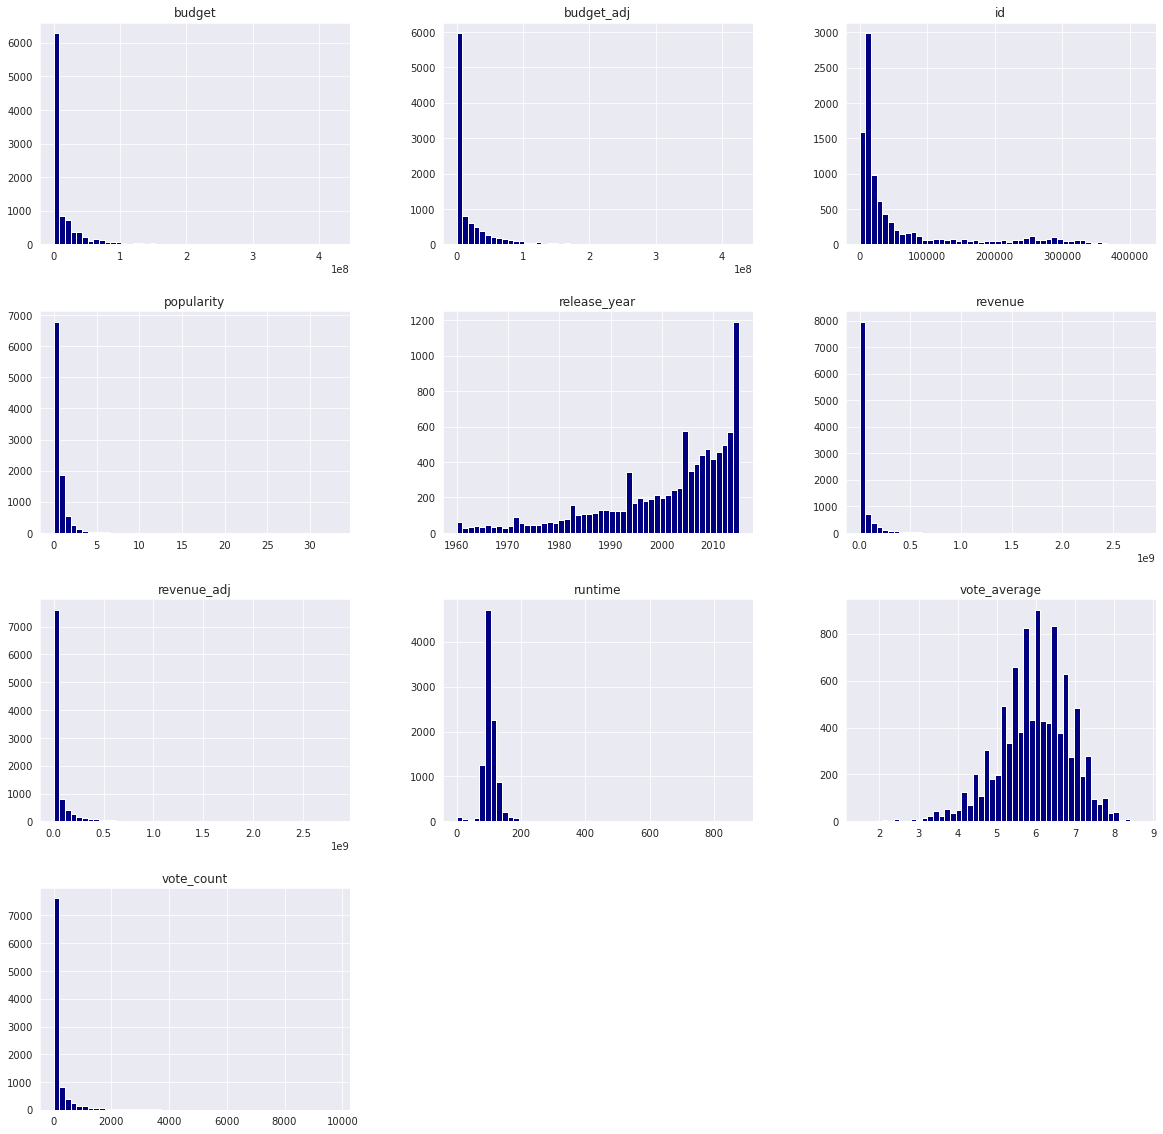

In [15]:
# Histograms of the data
df.hist(bins=50,figsize=(20,20),color='navy');

### Research Question 1 (Which year had the most released movies?)

In [16]:
most_released = df.groupby('release_year')['original_title'].count().reset_index(name='counts').\
                sort_values('counts', ascending=False)
most_released.head(3)

,release_year,counts
54,2014,635
53,2013,567
55,2015,558


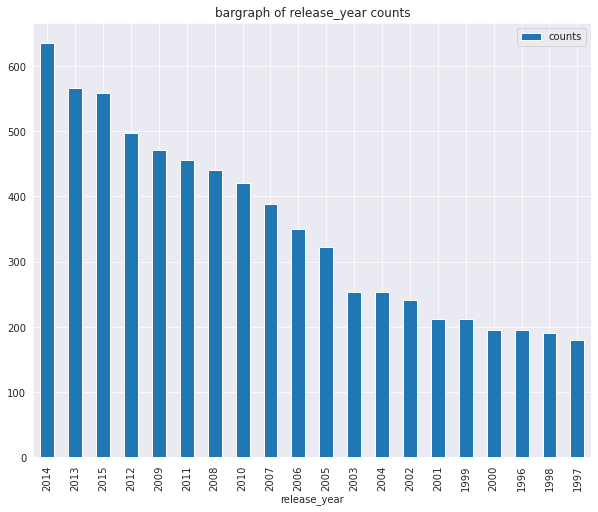

In [17]:
most_released[:20].plot.bar(x='release_year', y='counts', figsize=(10, 8))
plt.title("bargraph of release_year counts")
plt.show()

**2014 had the most released movies, 700 movies were released that year**

### Research Question 2 (Which movie had the highest budget?)

In [18]:
ind = df['budget_adj'].idxmax()
df.loc[ind][['original_title', 'budget_adj']]

original_title    The Warrior's Way
budget_adj                 4.25e+08
Name: 2244, dtype: object

### Research Question 3 (which movie was most profitable)

In [19]:
# revenue and budget should be grater than 0
profits_df = df.query('budget_adj > 0 & revenue_adj > 0').copy()

profits_df['profits'] = profits_df['revenue_adj'] - profits_df['budget_adj']

ind = profits_df['profits'].idxmax()

profits_df.loc[ind][['original_title', 'profits']]

original_title      Star Wars
profits           2.75014e+09
Name: 1329, dtype: object

In [20]:
column = profits_df["profits"]
max_index = column.idxmax()
max_index

1329

In [21]:
# Sort and ignore index
profits = profits_df.sort_values('profits', ignore_index=True, ascending=False)

profits.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits
0,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09
1,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09
2,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09
3,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,12-year-old Regan MacNeil begins to adapt an e...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09,2.128036e+09
4,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,An insatiable great white shark terrorizes the...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09,1.878643e+09


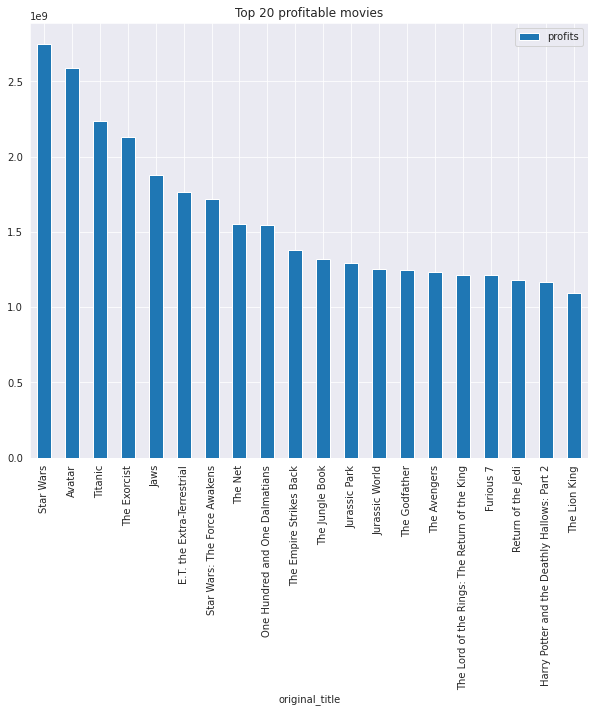

In [22]:
profits[:20].plot.bar(x='original_title', y='profits', figsize=(10, 8));
plt.title("Top 20 profitable movies")
plt.show()

**Star wars, Avatar and titanic were the most profitable movies respectively**

### Research Question 4 (Top 10 genres of movies produced)

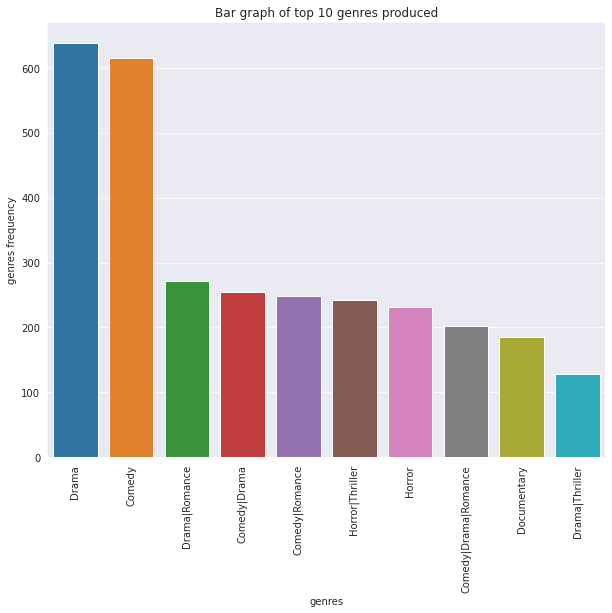

In [23]:
genres_count  = df['genres'].value_counts()
genres_count = genres_count[:10,]
plt.figure(figsize=(10,8))
sns.barplot(genres_count.index, genres_count.values)
plt.title('Bar graph of top 10 genres produced')
plt.ylabel('genres frequency')
plt.xlabel('genres')
plt.xticks(rotation = 90)
plt.show()

**Drama and comedy genres are the most produced genres respectively**

### Research Question 5 (Top rated genres)

In [24]:
top_rated_genres = df.groupby('genres')['vote_average'].mean().sort_values(ascending=False)
top_rated_genres[:30]

genres
Fantasy|Drama|Crime                                  8.0
Romance|Comedy|Animation|Drama|Family                8.0
Family|Animation|Fantasy                             8.0
Mystery|Documentary|Crime                            8.0
History|Drama|Thriller|War                           8.0
Animation|Drama|Fantasy                              7.9
Action|Thriller|Science Fiction|Mystery|Adventure    7.9
Science Fiction|Adventure|Drama|Fantasy              7.9
Science Fiction|Drama|Romance|Fantasy                7.8
Science Fiction|Drama|Romance                        7.8
Animation|Romance                                    7.8
Action|Adventure|Drama|Foreign|History               7.8
Adventure|Family|Animation|Action|Comedy             7.8
Romance|Science Fiction|Drama                        7.8
War|Drama|Action|Adventure|History                   7.8
Adventure|Comedy|Science Fiction|Family              7.8
Drama|Animation|War                                  7.7
Action|Comedy|Science Fi

### Research Question 6 (Movies with the longest runtime)

In [25]:
df[['original_title', 'runtime']].sort_values('runtime', ascending=False)[:10]

,original_title,runtime
4041,Taken,877
2722,Band of Brothers,705
6176,Shoah,566
2214,The Pacific,540
1865,Life,500
3141,Generation Kill,470
2170,The Pillars of the Earth,421
6008,Crystal Lake Memories: The Complete History of...,400
2843,The Blue Planet,400
4788,World Without End,389


### Research Question 7 (Which company has produced the most movies)

In [26]:
df.groupby('production_companies')['production_companies'].count().sort_values(ascending=False)[:10]

production_companies
Paramount Pictures                        156
Universal Pictures                        133
Warner Bros.                               84
Walt Disney Pictures                       75
Metro-Goldwyn-Mayer (MGM)                  72
Columbia Pictures                          72
New Line Cinema                            61
Touchstone Pictures                        51
20th Century Fox                           50
Twentieth Century Fox Film Corporation     49
Name: production_companies, dtype: int64

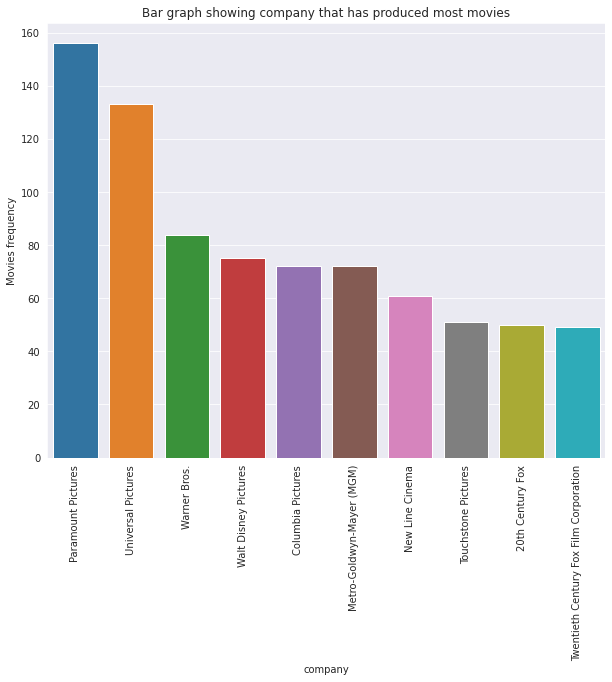

In [27]:
genres_count  = df['production_companies'].value_counts()
genres_count = genres_count[:10,]
plt.figure(figsize=(10,8))
sns.barplot(genres_count.index, genres_count.values)
plt.title('Bar graph showing company that has produced most movies')
plt.ylabel('Movies frequency')
plt.xlabel('company')
plt.xticks(rotation = 90)
plt.show()

**paramount pictures and Universal pictures companies are the companies with most movies respectively**

### Research Question 8 ( What is the linear relationship of several columns)

#### Is popularity related to revenue?

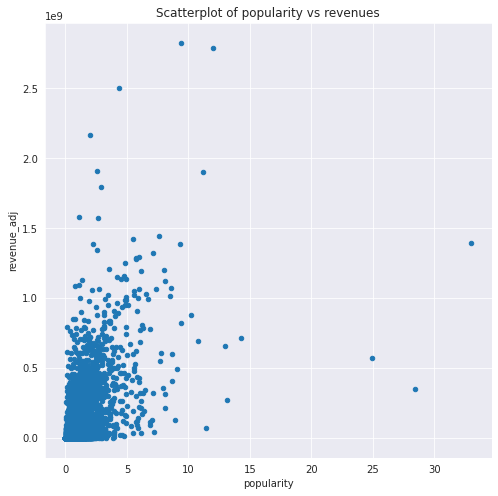

In [28]:
df.plot(x="popularity", y="revenue_adj", kind="scatter", figsize=(8, 8))
plt.title('Scatterplot of popularity vs revenues')
plt.show()

**popularity and revenue have a slight positive correlation**

#### Relation between popularity vs vote count

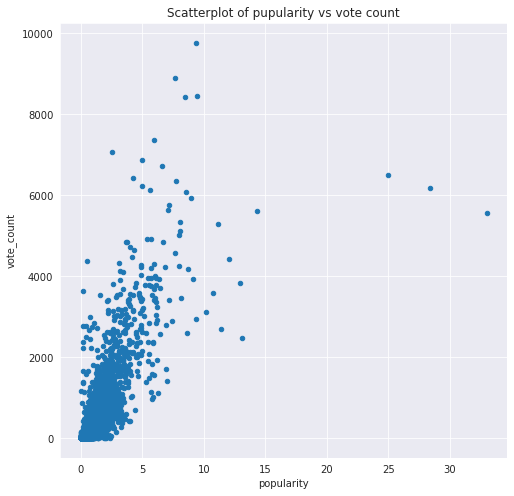

In [29]:
df.plot(x="popularity", y="vote_count", kind="scatter", figsize=(8, 8))
plt.title('Scatterplot of pupularity vs vote count')
plt.show()

**Vote count is positively correlated with popularity, which is obvious the more the movie is popular the more it get votes**

#### Relation between budget vs revenue

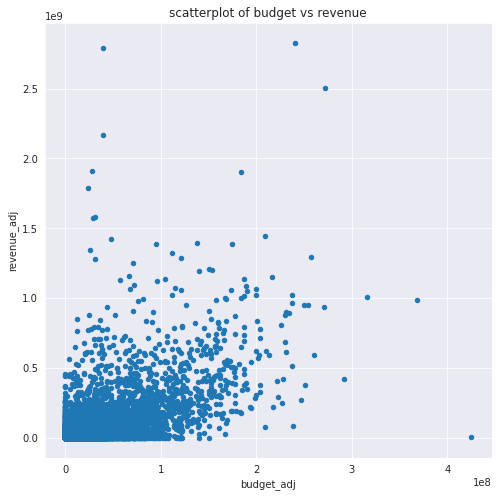

In [30]:
df.plot(x="budget_adj", y="revenue_adj", kind="scatter", figsize=(8, 8))
plt.title("scatterplot of budget vs revenue")
plt.show()

**Revenue and budget seem to roughly have a slight positive correleation**

In [31]:
df.groupby('director')['vote_average'].mean().sort_values(ascending=False)

director
David Mallet                            8.7
Martin Scorsese|Michael Henry Wilson    8.5
Curt Morgan                             8.5
Saul Swimmer                            8.5
Jorge RamÃ­rez SuÃ¡rez                  8.4
                                       ... 
Justin Russell                          2.2
Lawrence Kasanoff                       2.2
Brett Kelly                             2.0
Harold P. Warren                        1.5
Leigh Scott                             1.5
Name: vote_average, Length: 4504, dtype: float64

### Research Question 9 (Director with most produced movies)

In [32]:
df.groupby('director')['id'].count().sort_values(ascending=False)

director
Woody Allen                       42
Clint Eastwood                    34
Steven Spielberg                  29
Martin Scorsese                   26
Ridley Scott                      23
                                  ..
Lisanne Pajot|James Swirsky        1
Lisa James Larsson                 1
Lisa Gottlieb                      1
Lisa Barros D'Sa|Glenn Leyburn     1
 FrÃ©dÃ©ric Jardin                 1
Name: id, Length: 4504, dtype: int64

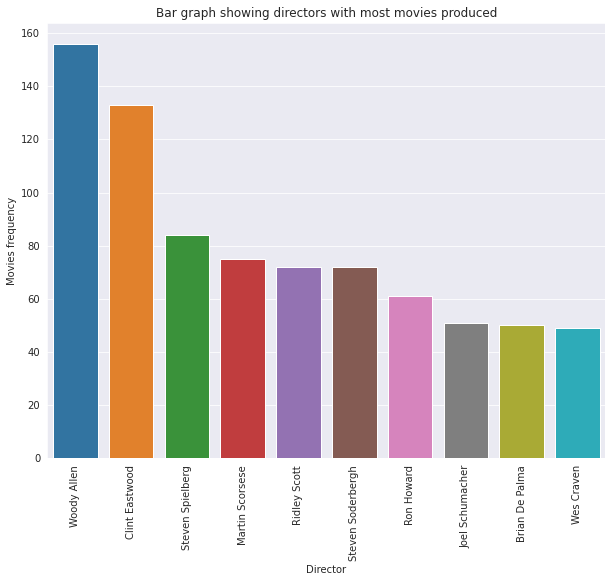

In [33]:
director_count  = df['director'].value_counts()
director_count = director_count[:10,]
plt.figure(figsize=(10,8))
sns.barplot(director_count.index, genres_count.values)
plt.title('Bar graph showing directors with most movies produced')
plt.ylabel('Movies frequency')
plt.xlabel('Director')
plt.xticks(rotation = 90)
plt.show()

### Top rated movies

In [34]:
## first divide average rate by vote count to have normalized column

df['rating_score'] = df['vote_average'] / df['vote_count']
df['rating_score'].head(3)

0    0.001169
1    0.001148
2    0.002540
Name: rating_score, dtype: float64

In [35]:
top_rated_movies = df.sort_values(by='rating_score', ascending=False)
top_rated_movies[['original_title', 'rating_score']].head()

,original_title,rating_score
1225,Billy Elliot: The Musical,0.810000
8221,A Personal Journey with Martin Scorsese Throug...,0.772727
6882,Glass House: The Good Mother,0.770000
5986,"Guten Tag, RamÃ³n",0.763636
5118,Les Enfants de la Pluie,0.760000


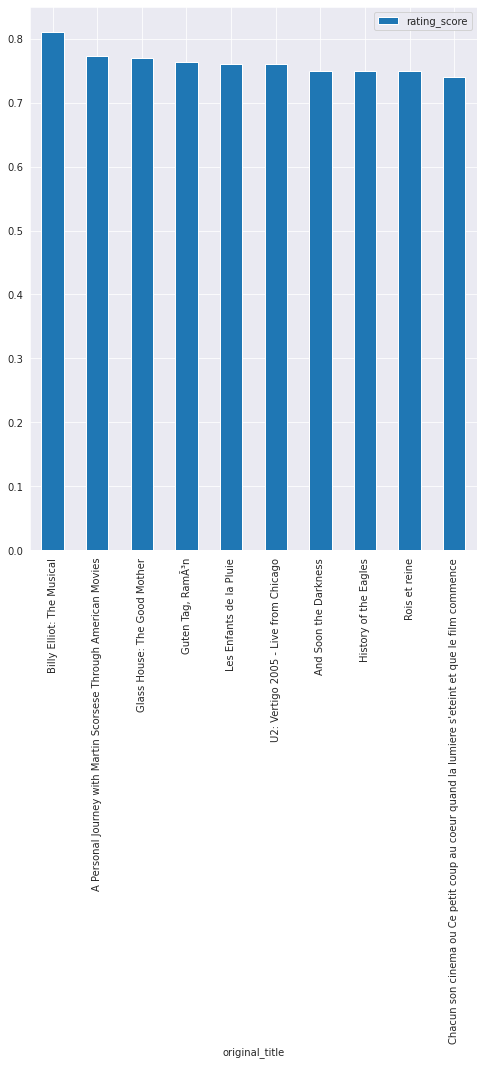

In [36]:
top_rated_movies[:10].plot.bar(x='original_title', y='rating_score', figsize=(8, 10));

**Billy Elliot: The Musical	 seems to be the most rated movie**

### Research Question 1 (whats the distribution of top rated movies and less rated movies)

In [37]:
df.vote_average.describe()

count    9770.000000
mean        5.963388
std         0.913207
min         1.500000
25%         5.400000
50%         6.000000
75%         6.600000
max         8.700000
Name: vote_average, dtype: float64

In [38]:
np.mean(df.vote_average)

5.963387922210849

In [39]:
df['score'] = np.where(df['vote_average'] >= (np.mean(df.vote_average)), 'good', 'poor')
df['score'].sample(5)

10543    good
4419     good
3331     good
2671     good
4155     good
Name: score, dtype: object

In [40]:
df['score'].value_counts(normalize=True)

good    0.530809
poor    0.469191
Name: score, dtype: float64

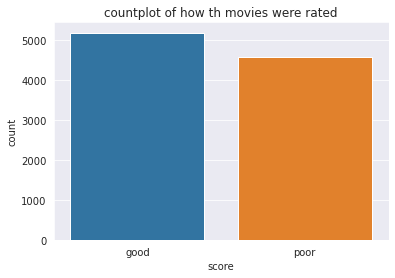

In [41]:
sns.countplot(x='score', data=df)
plt.title('countplot of how th movies were rated')
plt.show()

**There were more good rated movies, 0.53 percent compared to poor ata 0.47**

<a id='conclusions'></a>
## Conclusions

**I found 2014 to be year with most produced movies**
**The Warrior's Way to be the movies the the highest budget**, 
**Star wars movie to be the movie that was most profitable**
**paramount pictures and universal pictures to be the companies with most movies produced.**
**Drama and comedy movies were the most produced genres and the movies with this genres in them shows to be rated well also**
**director: Woody Allen had the most produced movies, he has produced aproximately 42 movies**
**top rated movies seems also to be higher than less rated movies**

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0